In [1]:
from policyengine_us import Microsimulation

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import requests
import us

/home/fakl/policyengine/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sim = Microsimulation(dataset="hf://policyengine/test/sparse_cd_stacked_2023.h5")

In [4]:
sim.calculate("income_tax")
sim.calculate("congressional_district_geoid")
sim.calculate("income_tax", map_to="household")

                value       weight
0       118605.195312  1788.619995
1       120479.234375  1788.619995
2       122016.132812  1788.619995
3        58329.746094   910.309998
4        72236.640625   910.309998
...               ...          ...
272566   44476.289062     0.000000
272567   36985.035156     0.000000
272568   32740.031250     0.000000
272569   22880.488281     0.000000
272570    4313.185059     0.000000

[272571 rows x 2 columns]

In [12]:
df = sim.calculate_dataframe(["congressional_district_geoid","income_tax"])

In [13]:
df['weighted_income_tax'] = df.weights * df['income_tax']

In [14]:
w_income_tax = df.groupby('congressional_district_geoid')['weighted_income_tax'].sum()

In [ ]:
district_code = []
single_district_states = ['DC', 'AK', 'DE', 'ND', 'SD', 'VT', 'WY']
for i in w_income_tax.index:
    state_fips = "{:02d}".format(i//100)
    state_abbr = "DC" if state_fips=="11" else us.states.lookup(state_fips).abbr
    district_id = "0" if state_abbr in single_district_states else "{:d}".format(i%100) 
    district_code.append("{}-{}".format(state_abbr, district_id))

In [ ]:
# districts = ['PA-4', 'PA-5']
file_url = "https://kml.house.gov/current/{district}/shape.kml"
local_filename = "{district}.kml"

for d in district_code:
    try:
        response = requests.get(file_url.format(district=d), stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    
        with open(local_filename.format(district=d), 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{local_filename.format(district=d)}' downloaded successfully.")
    
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

In [ ]:
gdfs = []
for d in district_code:
    gdf = gpd.read_file(local_filename.format(district=d), driver='libkml')
    gdfs.append(gdf)
combined_gdf = pd.concat(gdfs, ignore_index=True)

In [ ]:
combined_gdf['geoid'] = w_income_tax.index
combined_gdf['income_tax'] = w_income_tax.values

<Axes: >

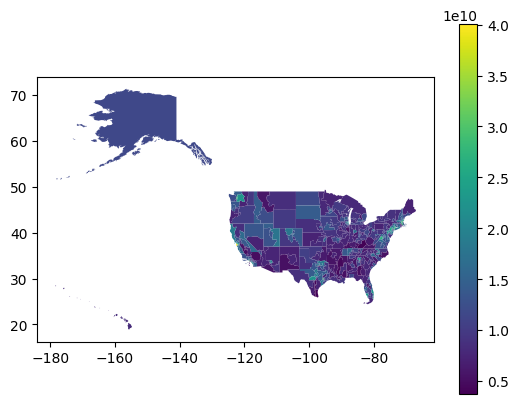

In [116]:
combined_gdf.plot(column='income_tax', legend=True)

# old

In [45]:
districts = ['PA-4', 'PA-5']
file_url = "https://kml.house.gov/current/{district}/shape.kml"
local_filename = "{district}.kml"

for d in districts:
    try:
        response = requests.get(file_url.format(district=d), stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    
        with open(local_filename.format(district=d), 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{local_filename.format(district=d)}' downloaded successfully.")
    
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

File 'PA-4.kml' downloaded successfully.
File 'PA-5.kml' downloaded successfully.


In [48]:
gdfs = []
for d in districts:
    gdf = gpd.read_file(local_filename.format(district=d), driver='libkml')
    gdfs.append(gdf)
combined_gdf = pd.concat(gdfs, ignore_index=True)

In [52]:
combined_gdf['value'] = [1,2]

<Axes: >

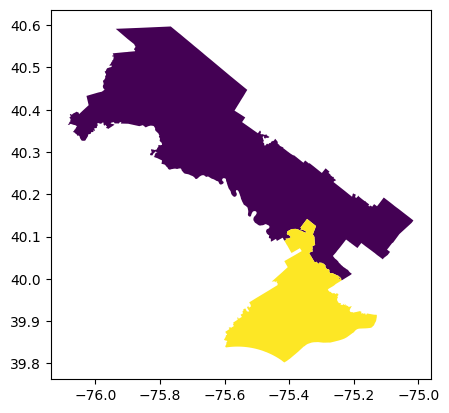

In [54]:
combined_gdf.plot(column='value')

In [84]:
district_code = []
single_district_states = ['DC', 'AK', 'DE', 'ND', 'SD', 'VT', 'WY']
for i in w_income_tax.index:
    state_fips = "{:02d}".format(i//100)
    state_abbr = "DC" if state_fips=="11" else us.states.lookup(state_fips).abbr
    district_id = "0" if state_abbr in single_district_states else "{:d}".format(i%100) 
    district_code.append("{}-{}".format(state_abbr, district_id))

In [85]:
# districts = ['PA-4', 'PA-5']
file_url = "https://kml.house.gov/current/{district}/shape.kml"
local_filename = "{district}.kml"

for d in district_code:
    try:
        response = requests.get(file_url.format(district=d), stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
    
        with open(local_filename.format(district=d), 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"File '{local_filename.format(district=d)}' downloaded successfully.")
    
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")

File 'AL-1.kml' downloaded successfully.
File 'AL-2.kml' downloaded successfully.
File 'AL-3.kml' downloaded successfully.
File 'AL-4.kml' downloaded successfully.
File 'AL-5.kml' downloaded successfully.
File 'AL-6.kml' downloaded successfully.
File 'AL-7.kml' downloaded successfully.
File 'AK-0.kml' downloaded successfully.
File 'AZ-1.kml' downloaded successfully.
File 'AZ-2.kml' downloaded successfully.
File 'AZ-3.kml' downloaded successfully.
File 'AZ-4.kml' downloaded successfully.
File 'AZ-5.kml' downloaded successfully.
File 'AZ-6.kml' downloaded successfully.
File 'AZ-7.kml' downloaded successfully.
File 'AZ-8.kml' downloaded successfully.
File 'AZ-9.kml' downloaded successfully.
File 'AR-1.kml' downloaded successfully.
File 'AR-2.kml' downloaded successfully.
File 'AR-3.kml' downloaded successfully.
File 'AR-4.kml' downloaded successfully.
File 'CA-1.kml' downloaded successfully.
File 'CA-2.kml' downloaded successfully.
File 'CA-3.kml' downloaded successfully.
File 'CA-4.kml' 

In [86]:
gdfs = []
for d in district_code:
    gdf = gpd.read_file(local_filename.format(district=d), driver='libkml')
    gdfs.append(gdf)
combined_gdf = pd.concat(gdfs, ignore_index=True)

In [90]:
combined_gdf['geoid'] = w_income_tax.index

In [110]:
combined_gdf['income_tax'] = w_income_tax.values

In [107]:
w_income_tax

congressional_district_geoid
101     6.762791e+09
102     7.889454e+09
103     5.638690e+09
104     6.437537e+09
105     9.734521e+09
            ...     
5505    1.383569e+10
5506    9.194884e+09
5507    9.841611e+09
5508    9.072424e+09
5601    9.928714e+09
Name: weighted_income_tax, Length: 436, dtype: float64

<Axes: >

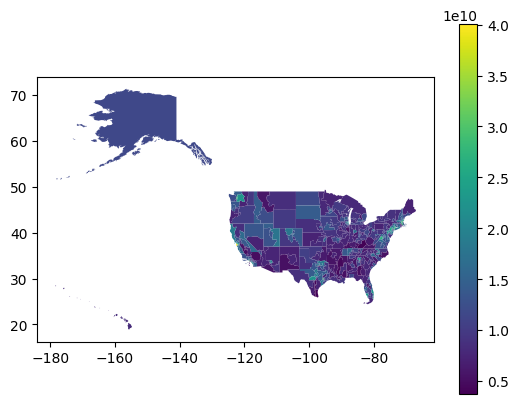

In [114]:
combined_gdf.plot(column='income_tax', legend=True)

(array([ 86., 154.,  94.,  47.,  22.,  20.,   6.,   6.,   0.,   1.]),
 array([3.74012600e+09, 7.36773657e+09, 1.09953471e+10, 1.46229577e+10,
        1.82505683e+10, 2.18781789e+10, 2.55057895e+10, 2.91334000e+10,
        3.27610106e+10, 3.63886212e+10, 4.00162318e+10]),
 <BarContainer object of 10 artists>)

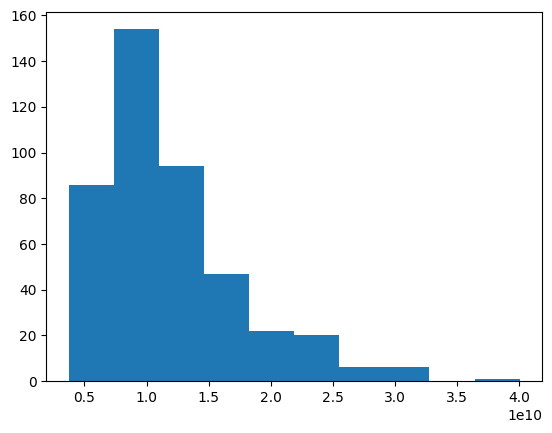

In [115]:
plt.hist(combined_gdf['income_tax'])